Negative Image Processing
=========================

Alisya Rahma Safitra - 24060120120031
Naufal Taufiqi Akbar - 24060120130064
Rayhan Illyas Annabil - 24060120120004
Tobias Martin Suena -  24060120140040


In [1]:
import numpy as np # untuk operasi di cpu
import time # untuk mengukur waktu eksekusi
import matplotlib.pyplot as plt  # untuk visualisasi gambar
import matplotlib.image as mpimg # untuk membaca gambar
import cupy as cp # untuk operasi di gpu
from numba import cuda # untuk mengakses gpu

In [2]:
def imgshow(img): # fungsi untuk menampilkan gambar pada cpu
    plt.figure(figsize = (5, 5))
    plt.imshow(img)

def imgshow2(img): # fungsi untuk menampilkan gambar pada gpu
    plt.figure(figsize = (5, 5))
    plt.imshow(img.get())

In [3]:
img256 = plt.imread('./images/256.jpg')
img512 = plt.imread('./images/512.jpg')
img1024 = plt.imread('./images/1024.jpg')
img2048 = plt.imread('./images/2048.jpg')

Img256
 


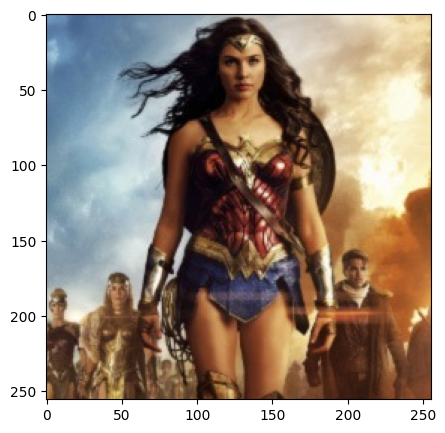

In [4]:
print('Img256')
imgshow(img256)
print(' ')

Img512
 


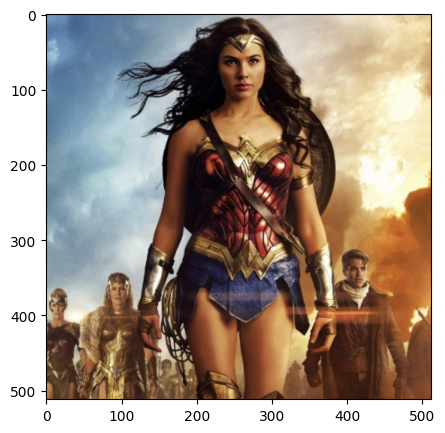

In [5]:
print('Img512')
imgshow(img512)
print(' ')

Img1024
 


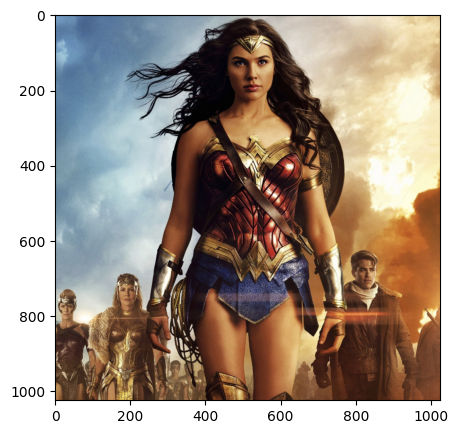

In [6]:
print('Img1024')
imgshow(img1024)
print(' ')

Img2048


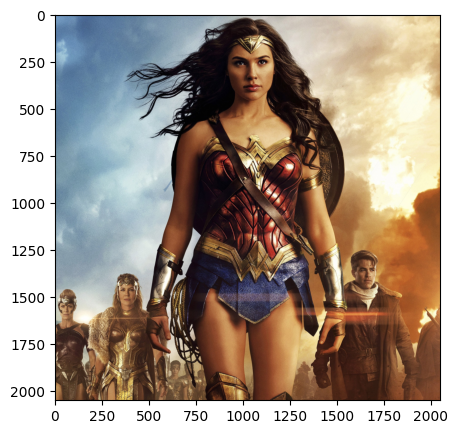

In [7]:
print('Img2048')
imgshow(img2048)

In [8]:
# Image processing menggunakan CPU
def rgbToNegativeCPU(img):
    negative = np.zeros(img.shape, dtype = np.uint8) # Membuat array kosong dengan ukuran sama dengan img
    # Melakukan perulangan untuk setiap pixel array img
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                negative[i][j][k] = 255 - img[i][j][k] # Melakukan operasi negative
    return negative

Image 256 
Time taken by CPU (256):  0.5541529655456543
 


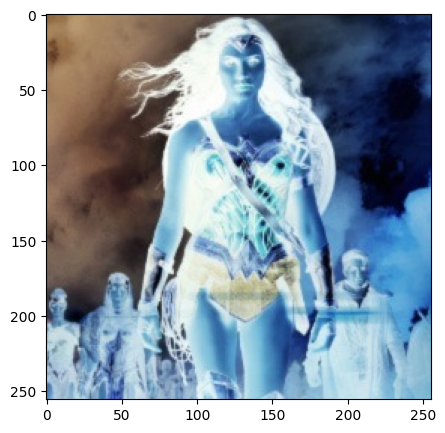

In [9]:
print('Image 256 ')
start = time.time()
converted_img_256 = rgbToNegativeCPU(img256)
end = time.time()
tc256 = end - start
print('Time taken by CPU (256): ', tc256)

imgshow(converted_img_256)
print(' ')

Image 512 
Time taken by CPU (512):  2.2305078506469727
 


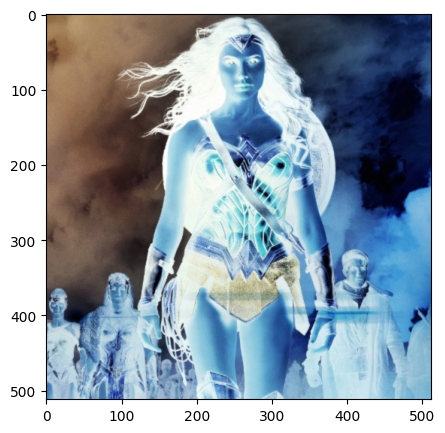

In [10]:

print('Image 512 ')
start = time.time()
converted_img_512 = rgbToNegativeCPU(img512)
end = time.time()
tc512 = end - start
print('Time taken by CPU (512): ', tc512)

imgshow(converted_img_512)
print(' ')


Image 1024 
Time taken by CPU (1024):  8.885611772537231
 


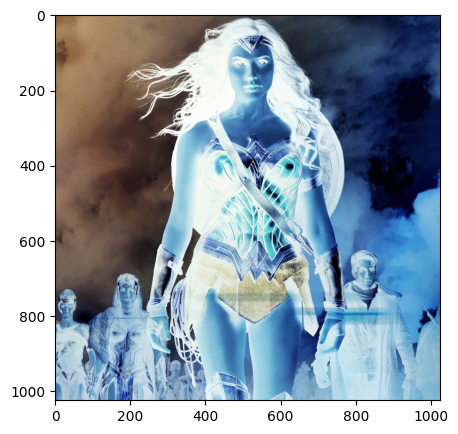

In [11]:
print('Image 1024 ')
start = time.time()
converted_img_1024 = rgbToNegativeCPU(img1024)
end = time.time()
tc1024 = end - start
print('Time taken by CPU (1024): ', tc1024)

imgshow(converted_img_1024)
print(' ')

Image 2048 
Time taken by CPU (2048):  35.182926654815674


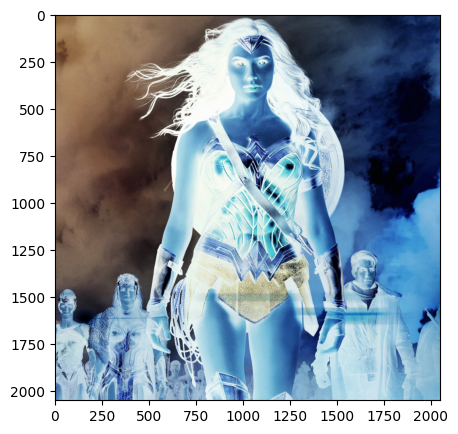

In [12]:
print('Image 2048 ')
start = time.time()
converted_img_2048 = rgbToNegativeCPU(img2048)
end = time.time()
tc2048 = end - start
print('Time taken by CPU (2048): ', tc2048)

imgshow(converted_img_2048)

In [13]:
# add cupy for img256, img512, img1024
img256 = cp.asarray(img256)
img512 = cp.asarray(img512)
img1024 = cp.asarray(img1024)
img2048 = cp.asarray(img2048)

@cuda.jit # Melakukan dekorasi fungsi dengan cuda.jit
def rgbToNegativeGPU(img, negative):
    i, j, k = cuda.grid(3) # Mendapatkan index dari thread
    if i < img.shape[0] and j < img.shape[1] and k < img.shape[2]: # Melakukan pengecekan agar tidak melebihi ukuran array
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                for k in range(img.shape[2]):
                    negative[i][j][k] = 255 - img[i][j][k] # Melakukan operasi negative

def blockspergrid(img):  
    threadsperblock = (16, 16, 3) # Mendefinisikan ukuran thread per blok
    blockspergrid_x = int(np.ceil(img.shape[0] / threadsperblock[0])) # Mendefinisikan ukuran blok per grid
    blockspergrid_y = int(np.ceil(img.shape[1] / threadsperblock[1])) # Mendefinisikan ukuran blok per grid
    blockspergrid_z = int(np.ceil(img.shape[2] / threadsperblock[2])) # Mendefinisikan ukuran blok per grid
    blockspergrid = (blockspergrid_x, blockspergrid_y, blockspergrid_z) 
    return blockspergrid

threadsperblock = (1024) # Mendefinisikan ukuran thread per blok

negative256 = cp.zeros(img256.shape, dtype = np.uint8)
negative512 = cp.zeros(img512.shape, dtype = np.uint8)
negative1024 = cp.zeros(img1024.shape, dtype = np.uint8)
negative2048 = cp.zeros(img2048.shape, dtype = np.uint8)




Image 256 
Time taken by GPU (256):  0.5501210689544678
 


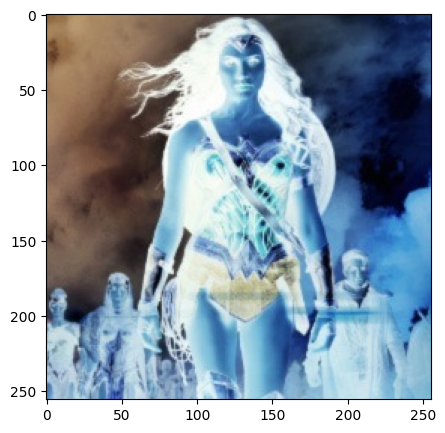

In [14]:
print('Image 256 ')
start = time.time()
converted_gpu_img_256 = rgbToNegativeGPU[blockspergrid(img256), threadsperblock](img256, negative256)
end = time.time()
tg256 = end - start
print('Time taken by GPU (256): ', tg256)

imgshow2(negative256)
print(' ')


Image 512 
Time taken by GPU (512):  0.0019998550415039062
 


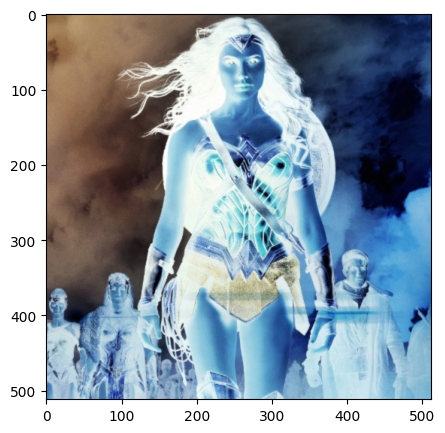

In [15]:
print('Image 512 ')
start = time.time()
converted_gpu_img_512 = rgbToNegativeGPU[blockspergrid(img512), threadsperblock](img512, negative512)
end = time.time()
tg512 = end - start
print('Time taken by GPU (512): ', tg512)

imgshow2(negative512)
print(' ')

Image 1024 
Time taken by GPU (1024):  0.0030002593994140625
 


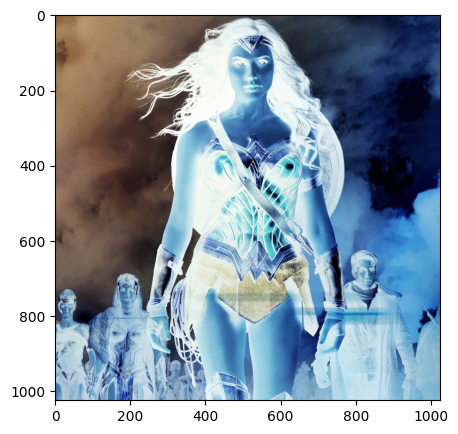

In [16]:
print('Image 1024 ')
start = time.time()
converted_gpu_img_1024 = rgbToNegativeGPU[blockspergrid(img1024), threadsperblock](img1024, negative1024)
end = time.time()
tg1024 = end - start
print('Time taken by GPU (1024): ', tg1024)

imgshow2(negative1024)
print(' ')

Image 2048 
Time taken by GPU (2048):  0.002002716064453125
 


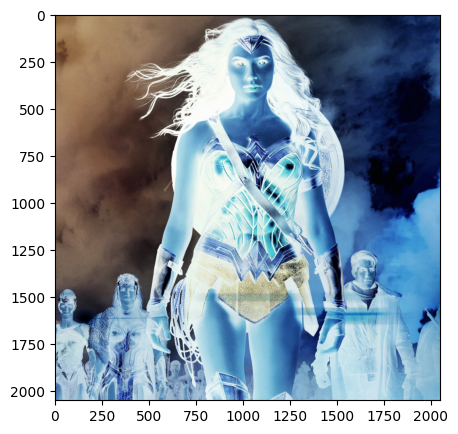

In [17]:
print('Image 2048 ')
start = time.time()
converted_gpu_img_2048 = rgbToNegativeGPU[blockspergrid(img2048), threadsperblock](img2048, negative2048)
end = time.time()
tg2048 = end - start
print('Time taken by GPU (2048): ', tg2048)

imgshow2(negative2048)
print(' ')

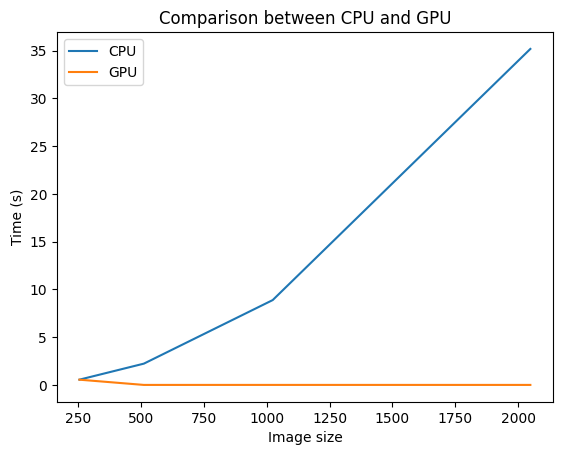

In [18]:
# make a comparison line chart between time taken by CPU and GPU

x = np.array([256, 512, 1024, 2048])
y_cpu = np.array([tc256, tc512, tc1024, tc2048])
y_gpu = np.array([tg256, tg512, tg1024, tg2048])

plt.plot(x, y_cpu, label='CPU')
plt.plot(x, y_gpu, label='GPU')

plt.xlabel('Image size')
plt.ylabel('Time (s)')
plt.title('Comparison between CPU and GPU')
plt.legend()
plt.show()

